###  Autor: Lilian Rebeca Carrera Lemus 
No. Carnet: 20008077  


# Ejercicio: Maldición de Dimensionalidad


**Maldición de Dimensionalidad**  
En Machine Learning, el número de dimensiones se puede equiparar al número de variables o características (features) que estemos utilizando, por lo cual, a medida que agregamos más dimensiones, también aumentamos la capacidad de procesamiento que necesitamos para analizar los datos, y también aumentamos la cantidad de datos de entrenamiento necesarios para hacer modelos significativos.

Así mismo, al momento de que tenemos un aumento de features, la cantidad de parámetros puede incrementar muy rápidamente, hasta al punto en el que se vuelva poco práctico entrenar estos modelos. Al aumentar la cantidad de parámtros entrenables incrementa la posibilidad de que nuestro modelo sufra de overfitting, o sobreajuste, y este tenga un error de generalización mayor de lo deseado. Para combatir esto generalmente se suele recurrir a técnicas de regularización, o a tener que aumentar mucho la cantidad de datos en nuestro set de entrenamiento.

A continuación se muestra cómo al utilizar un modelo de regresión polinomial que toma en cuenta los términos de interacción entre variables, al incrementar el grado del polinomio con el que se desea modelar los datos la cantidad de parámetros incrementa rápidamente.

In [1]:
#Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures #Para generar features polinomiales

In [2]:
#Para ejemplificar la maldición de dimensionalidad, utlizaremos el dataset de iris
iris = sns.load_dataset('iris')
#Eliminamos la variable categoríca
iris = iris.drop('species', axis = 1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Grado dos
grado_2 = PolynomialFeatures(2)
#Features polinomiales de grado 2
grado_2_features = grado_2.fit_transform(iris)

Como se puede observar a continuación, al utilizar un polinomio grado 2 el número de features aumenta de 4 a 15:

In [4]:
grado_2_features.shape[1]

15

**Generación de Features Polinomiales**

En general, vamos a generar features polinomiales desde polinimios de grado 2 hasta 50 para el dataset de iris y contabilizar la cantidad de features para cada uno.

In [5]:
cant_features = list()
for i in range(2,50):
    grado_i = PolynomialFeatures(i)
    grado_i_features = grado_i.fit_transform(iris)
    print("La cantidad de features para el polinomio grado " + str(i) + " es:" + str(grado_i_features.shape[1]))
    cant_features.append(grado_i_features.shape[1])

La cantidad de features para el polinomio grado 2 es:15
La cantidad de features para el polinomio grado 3 es:35
La cantidad de features para el polinomio grado 4 es:70
La cantidad de features para el polinomio grado 5 es:126
La cantidad de features para el polinomio grado 6 es:210
La cantidad de features para el polinomio grado 7 es:330
La cantidad de features para el polinomio grado 8 es:495
La cantidad de features para el polinomio grado 9 es:715
La cantidad de features para el polinomio grado 10 es:1001
La cantidad de features para el polinomio grado 11 es:1365
La cantidad de features para el polinomio grado 12 es:1820
La cantidad de features para el polinomio grado 13 es:2380
La cantidad de features para el polinomio grado 14 es:3060
La cantidad de features para el polinomio grado 15 es:3876
La cantidad de features para el polinomio grado 16 es:4845
La cantidad de features para el polinomio grado 17 es:5985
La cantidad de features para el polinomio grado 18 es:7315
La cantidad de f

**Graficamos los resultados obtenidos**

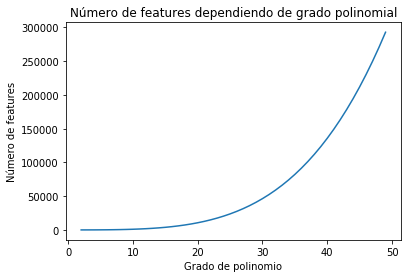

In [6]:
plt.plot(np.linspace(2,49,48), cant_features)
plt.title('Número de features dependiendo de grado polinomial')
plt.xlabel('Grado de polinomio')
plt.ylabel('Número de features')
plt.show()

**Conclusión**

Como se puede obsevar en las pruebas realizadas, el número de features aumenta exponencialmente conforme se aumenta el grado polinomial del modelo. A esto es lo que se le conoce como la maldición de la dimensionalidad, ya que al aumentar el número de dimensiones para elaborar un modelo, podemos llegar a tener una gran cantidad de features e información esparcida.